In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import numpy as np
import pandas as pd
from lmfit import Parameters, minimize, fit_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("../..")

from simstackwrapper import SimstackWrapper
from simstackresults import SimstackResults
from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Step 3.  This is where SEDs are fit to the combined stacked data

An MCMC is fit using emcee. Optional parameters are number of samples, number of initial sample to discard, the sigma-level for non-detections (i.e., upper limits), and whether to fit to quiescent or not.  For fits that converge to unrealistic local minima, Gaussian priors can be selected. 

In [2]:
# Import catalog with SimstackWrapper
combined_pickle_filename = "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150"
combined_pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities", combined_pickle_filename)
underscore_suffix = ""
path_ini_file = os.path.join(combined_pickle_path, "cosmos2020_farmer.ini")
path_pickle_file = os.path.join(combined_pickle_path, combined_pickle_filename+".pkl")
if os.path.isfile(path_ini_file):
    simstack_catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)
else:
    print(path_ini_file+' not found')

In [3]:
# Import saved stacking results
simstack_object = SimstackToolbox.import_saved_pickles(path_pickle_file)

In [4]:
# Inspect object keys
simstack_object.results_dict['band_results_dict'].keys()

dict_keys(['mips_24', 'pacs_green', 'pacs_red', 'spire_psw', 'spire_pmw', 'spire_plw', 'scuba_850'])

In [5]:
# Pass saved results into SimstackResults
simstack_object = SimstackResults(simstack_object)

In [6]:
# Pass saved results into SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [7]:
# Call parse_results which translates the raw results into a results_dict for plotting/interpreting.
simstack_object.parse_results(catalog_object=simstack_catalog_object, estimate_mcmcs=False)

In [8]:
# Extract SEDs Dict
sed_results_dict = simstack_object.results_dict['sed_bootstrap_results_dict']

In [9]:
# Extract Bootstrap Dict
bootstrap_results_dict = simstack_object.results_dict['bootstrap_results_dict']

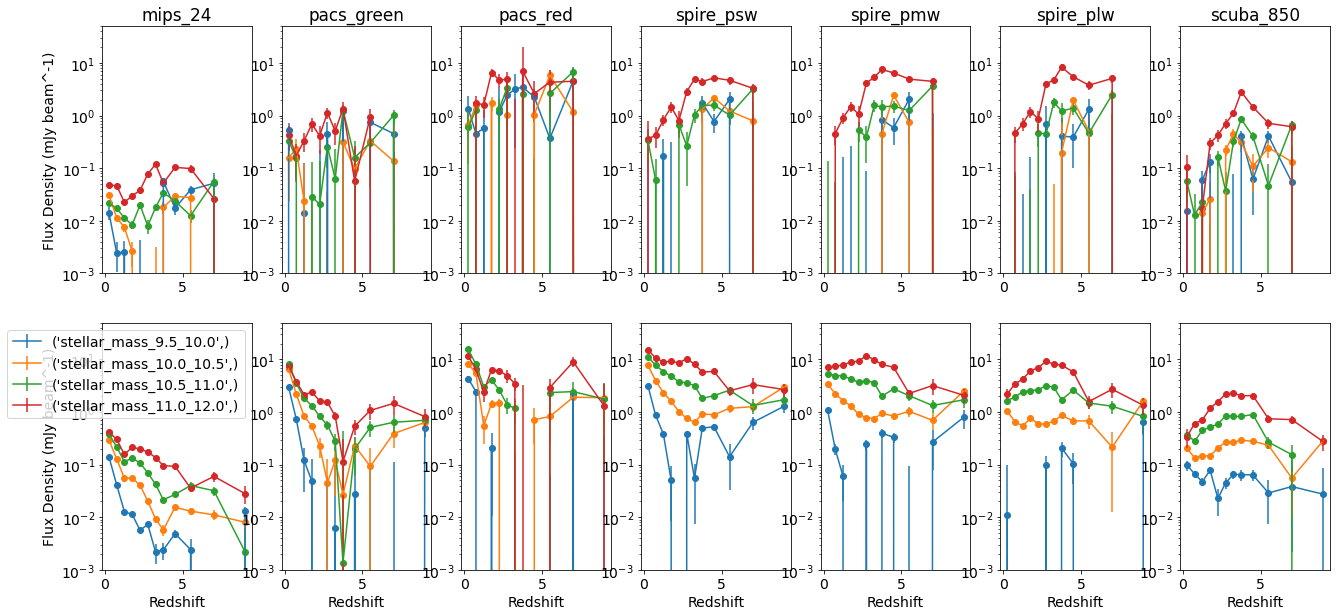

In [10]:
simstack_object.plot_flux_densities()

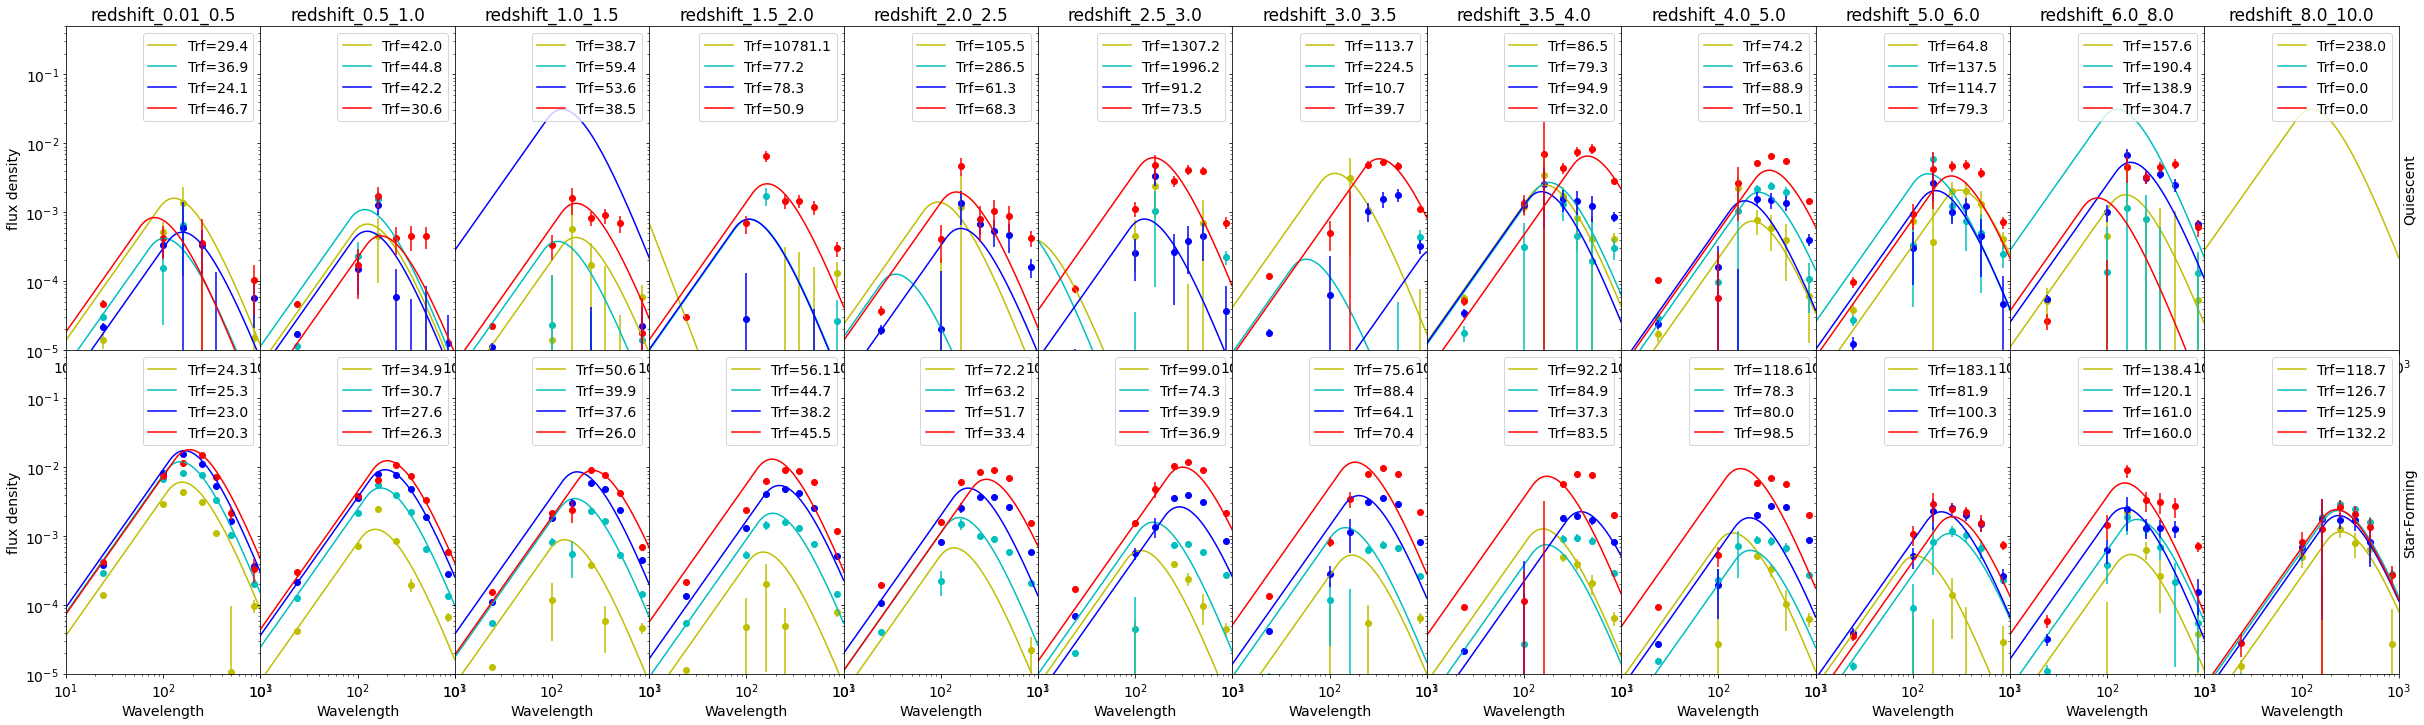

In [11]:
simstack_object.plot_seds(sed_results_dict)

In [12]:
# List bins to impose a Temperature prior on.  These are bins that find unphysical local minima.
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_1']

In [13]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_qt = True
sample_speed = ''
sample_prior = '_mixed_prior_qt'
mips_penalty='auto'
flat_prior = not_flat_prior
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)

In [14]:
# Load MCMC results
include_qt = sample_qt
overwrite_samples = True
samples_filename  ='_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
print(os.path.isfile(os.path.join(combined_pickle_path+underscore_suffix,samples_filename)))
if os.path.isfile(os.path.join(combined_pickle_path+underscore_suffix,samples_filename)) and not overwrite_samples:
    flat_samples_dict = SimstackToolbox.import_saved_pickles(os.path.join(combined_pickle_path+underscore_suffix,samples_filename))
    print('importing ',flat_samples_dict.keys())
else:
    print('estimating ',samples_filename)
    flat_samples_dict = simstack_object.loop_mcmc_sed_estimator(sed_results_dict, simstack_catalog_object.catalog_dict['tables'], 
                                                                mcmc_iterations=sample_number, mcmc_discard=sample_discard, sigma_upper_limit=sample_sigma,
                                                                flat_prior=flat_prior, include_qt=include_qt, mips_penalty=mips_penalty)

True
estimating  mcmc_samples_15000-3000-3sigma_mixed_prior_qt_dict.pkl
redshift_0.01_0.5__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=0.4) = 24.9+-0.25, A_init(z=0.4) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:30<00:00, 33.27it/s]


redshift_0.01_0.5__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=0.4) = 24.6+-0.25, A_init(z=0.4) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:56<00:00, 31.50it/s]


redshift_0.01_0.5__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=0.4) = 25.0+-0.25, A_init(z=0.4) = -35.7+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:48<00:00, 36.74it/s]


redshift_0.01_0.5__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=0.4) = 24.7+-0.25, A_init(z=0.4) = -35.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:02<00:00, 35.49it/s]


redshift_0.01_0.5__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=0.4) = 25.0+-0.25, A_init(z=0.4) = -35.2+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:32<00:00, 33.17it/s]


redshift_0.01_0.5__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=0.4) = 24.9+-0.25, A_init(z=0.4) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:12<00:00, 34.64it/s]


redshift_0.01_0.5__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=0.4) = 25.1+-0.25, A_init(z=0.4) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:05<00:00, 35.26it/s]


redshift_0.01_0.5__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=0.4) = 25.0+-0.25, A_init(z=0.4) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:00<00:00, 35.70it/s]


redshift_0.5_1.0__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=0.8) = 27.5+-0.25, A_init(z=0.8) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:56<00:00, 36.05it/s]


redshift_0.5_1.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -36.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [08:05<00:00, 30.91it/s]


redshift_0.5_1.0__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -35.7+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:45<00:00, 32.24it/s]


redshift_0.5_1.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -35.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:08<00:00, 35.04it/s]


redshift_0.5_1.0__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -35.2+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:24<00:00, 33.73it/s]


redshift_0.5_1.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=0.8) = 27.6+-0.25, A_init(z=0.8) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:59<00:00, 35.72it/s]


redshift_0.5_1.0__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=0.8) = 27.3+-0.25, A_init(z=0.8) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [33:20<00:00,  7.50it/s]


redshift_0.5_1.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=0.8) = 27.7+-0.25, A_init(z=0.8) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:58<00:00, 35.85it/s]


redshift_1.0_1.5__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=1.1) = 29.6+-0.25, A_init(z=1.1) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:54<00:00, 36.23it/s]


redshift_1.0_1.5__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=1.3) = 30.5+-0.25, A_init(z=1.3) = -36.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:46<00:00, 32.15it/s]


redshift_1.0_1.5__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=1.2) = 29.9+-0.25, A_init(z=1.2) = -35.7+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:07<00:00, 35.10it/s]


redshift_1.0_1.5__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=1.3) = 30.5+-0.25, A_init(z=1.3) = -35.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:58<00:00, 35.85it/s]


redshift_1.0_1.5__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=1.2) = 30.0+-0.25, A_init(z=1.2) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:18<00:00, 34.24it/s]


redshift_1.0_1.5__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=1.3) = 30.5+-0.25, A_init(z=1.3) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:00<00:00, 35.69it/s]


redshift_1.0_1.5__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=1.2) = 30.0+-0.25, A_init(z=1.2) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:17<00:00, 34.30it/s]


redshift_1.0_1.5__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=1.3) = 30.6+-0.25, A_init(z=1.3) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:00<00:00, 35.69it/s]


redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=1.7) = 33.6+-0.25, A_init(z=1.7) = -36.2+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:57<00:00, 35.91it/s]


redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1  informative prior
redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_prior(z=1.8) = 34.2+-0.25, A_prior(z=1.8) = -36.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:53<00:00, 31.69it/s]


redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=1.7) = 33.7+-0.25, A_init(z=1.7) = -35.7+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:06<00:00, 35.14it/s]


redshift_1.5_2.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=1.8) = 34.1+-0.25, A_init(z=1.8) = -35.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:03<00:00, 35.41it/s]


redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=1.7) = 33.8+-0.25, A_init(z=1.7) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:47<00:00, 36.82it/s]


redshift_1.5_2.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=1.8) = 34.0+-0.25, A_init(z=1.8) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:55<00:00, 36.13it/s]


redshift_1.5_2.0__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=1.7) = 33.6+-0.25, A_init(z=1.7) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:04<00:00, 41.12it/s]


redshift_1.5_2.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=1.7) = 33.9+-0.25, A_init(z=1.7) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:55<00:00, 36.11it/s]


redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=2.2) = 37.2+-0.25, A_init(z=2.2) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:26<00:00, 38.83it/s]


redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_1  informative prior
redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_1 : T_rf_prior(z=2.3) = 37.7+-0.25, A_prior(z=2.3) = -36.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:50<00:00, 31.86it/s]


redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=2.2) = 37.4+-0.25, A_init(z=2.2) = -35.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:31<00:00, 38.27it/s]


redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1  informative prior
redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1 : T_rf_prior(z=2.2) = 37.5+-0.25, A_prior(z=2.2) = -35.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:02<00:00, 35.51it/s]


redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=2.2) = 36.8+-0.25, A_init(z=2.2) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:23<00:00, 33.85it/s]


redshift_2.0_2.5__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=2.2) = 37.3+-0.25, A_init(z=2.2) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:05<00:00, 35.28it/s]


redshift_2.0_2.5__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=2.2) = 37.4+-0.25, A_init(z=2.2) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:02<00:00, 41.35it/s]


redshift_2.0_2.5__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=2.2) = 37.2+-0.25, A_init(z=2.2) = -34.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:58<00:00, 35.83it/s]


redshift_2.5_3.0__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=2.6) = 40.5+-0.25, A_init(z=2.6) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:35<00:00, 37.88it/s]


redshift_2.5_3.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=2.7) = 40.9+-0.25, A_init(z=2.7) = -36.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:52<00:00, 31.77it/s]


redshift_2.5_3.0__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=2.7) = 41.0+-0.25, A_init(z=2.7) = -35.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:20<00:00, 34.03it/s]


redshift_2.5_3.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=2.7) = 41.1+-0.25, A_init(z=2.7) = -35.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:46<00:00, 32.13it/s]


redshift_2.5_3.0__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=2.7) = 41.3+-0.25, A_init(z=2.7) = -35.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [05:57<00:00, 41.91it/s]


redshift_2.5_3.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=2.7) = 41.2+-0.25, A_init(z=2.7) = -35.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:56<00:00, 36.06it/s]


redshift_2.5_3.0__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=2.8) = 42.0+-0.25, A_init(z=2.8) = -34.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:00<00:00, 35.69it/s]


redshift_2.5_3.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=2.8) = 41.8+-0.25, A_init(z=2.8) = -34.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:57<00:00, 35.93it/s]


redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=3.2) = 44.8+-0.25, A_init(z=3.2) = -36.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:16<00:00, 39.82it/s]


redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_1  informative prior
redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_1 : T_rf_prior(z=3.2) = 45.4+-0.25, A_prior(z=3.2) = -36.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:54<00:00, 31.62it/s]


redshift_3.0_3.5__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=3.2) = 45.3+-0.25, A_init(z=3.2) = -35.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:05<00:00, 35.22it/s]


redshift_3.0_3.5__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=3.2) = 45.3+-0.25, A_init(z=3.2) = -36.0+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:45<00:00, 32.26it/s]


redshift_3.0_3.5__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=3.2) = 44.8+-0.25, A_init(z=3.2) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:28<00:00, 38.65it/s]


redshift_3.0_3.5__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=3.2) = 45.0+-0.25, A_init(z=3.2) = -35.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:55<00:00, 36.12it/s]


redshift_3.0_3.5__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=3.1) = 44.4+-0.25, A_init(z=3.1) = -34.8+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:45<00:00, 32.24it/s]


redshift_3.0_3.5__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=3.1) = 44.6+-0.25, A_init(z=3.1) = -34.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:54<00:00, 36.23it/s]


redshift_3.5_4.0__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=3.9) = 51.1+-0.25, A_init(z=3.9) = -36.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:44<00:00, 32.31it/s]


redshift_3.5_4.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=3.7) = 49.8+-0.25, A_init(z=3.7) = -36.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:48<00:00, 32.02it/s]


redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=3.7) = 49.7+-0.25, A_init(z=3.7) = -35.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:41<00:00, 32.50it/s]


redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_1  informative prior
redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_prior(z=3.7) = 49.6+-0.25, A_prior(z=3.7) = -36.0+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:54<00:00, 31.61it/s]


redshift_3.5_4.0__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=3.7) = 49.7+-0.25, A_init(z=3.7) = -35.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:40<00:00, 37.45it/s]


redshift_3.5_4.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=3.7) = 49.7+-0.25, A_init(z=3.7) = -35.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:47<00:00, 32.07it/s]


redshift_3.5_4.0__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=3.8) = 49.9+-0.25, A_init(z=3.8) = -34.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:43<00:00, 32.33it/s]


redshift_3.5_4.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=3.8) = 49.9+-0.25, A_init(z=3.8) = -35.0+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:45<00:00, 32.19it/s]


redshift_4.0_5.0__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=4.4) = 55.5+-0.25, A_init(z=4.4) = -36.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:43<00:00, 32.35it/s]


redshift_4.0_5.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=4.4) = 55.9+-0.25, A_init(z=4.4) = -36.6+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:46<00:00, 32.18it/s]


redshift_4.0_5.0__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=4.8) = 59.4+-0.25, A_init(z=4.8) = -36.0+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:50<00:00, 31.88it/s]


redshift_4.0_5.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=4.5) = 56.8+-0.25, A_init(z=4.5) = -36.0+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:56<00:00, 36.05it/s]


redshift_4.0_5.0__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=4.8) = 59.8+-0.25, A_init(z=4.8) = -35.4+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:44<00:00, 32.31it/s]


redshift_4.0_5.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=4.5) = 56.6+-0.25, A_init(z=4.5) = -35.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:44<00:00, 32.29it/s]


redshift_4.0_5.0__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=4.4) = 55.6+-0.25, A_init(z=4.4) = -35.0+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:18<00:00, 34.24it/s]


redshift_4.0_5.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=4.4) = 55.9+-0.25, A_init(z=4.4) = -34.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:43<00:00, 32.33it/s]


redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=5.3) = 64.8+-0.25, A_init(z=5.3) = -36.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:42<00:00, 32.42it/s]


redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_1  informative prior
redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_prior(z=5.4) = 65.2+-0.25, A_prior(z=5.4) = -36.6+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:41<00:00, 32.52it/s]


redshift_5.0_6.0__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=5.2) = 63.3+-0.25, A_init(z=5.2) = -35.9+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:50<00:00, 36.55it/s]


redshift_5.0_6.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=5.4) = 65.4+-0.25, A_init(z=5.4) = -36.1+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:51<00:00, 31.83it/s]


redshift_5.0_6.0__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=5.3) = 64.0+-0.25, A_init(z=5.3) = -35.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:53<00:00, 31.65it/s]


redshift_5.0_6.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=5.3) = 64.0+-0.25, A_init(z=5.3) = -35.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:55<00:00, 36.10it/s]


redshift_5.0_6.0__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=5.4) = 65.7+-0.25, A_init(z=5.4) = -35.1+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:55<00:00, 36.09it/s]


redshift_5.0_6.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=5.3) = 64.1+-0.25, A_init(z=5.3) = -35.0+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:55<00:00, 36.10it/s]


redshift_6.0_8.0__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=6.4) = 75.8+-0.25, A_init(z=6.4) = -36.6+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:58<00:00, 35.84it/s]


redshift_6.0_8.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=6.4) = 75.9+-0.25, A_init(z=6.4) = -36.6+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:41<00:00, 32.50it/s]


redshift_6.0_8.0__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=6.1) = 73.2+-0.25, A_init(z=6.1) = -36.1+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:23<00:00, 39.08it/s]


redshift_6.0_8.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=6.8) = 79.9+-0.25, A_init(z=6.8) = -36.1+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [06:52<00:00, 36.38it/s]


redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=6.3) = 74.5+-0.25, A_init(z=6.3) = -35.3+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:04<00:00, 35.37it/s]


redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_1  informative prior
redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_prior(z=6.9) = 81.8+-0.25, A_prior(z=6.9) = -35.5+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:12<00:00, 34.65it/s]


redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=6.3) = 75.0+-0.25, A_init(z=6.3) = -35.1+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:59<00:00, 31.29it/s]


redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_1  informative prior
redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_prior(z=6.9) = 82.0+-0.25, A_prior(z=6.9) = -35.0+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:14<00:00, 34.53it/s]


redshift_8.0_10.0__stellar_mass_9.5_10.0__split_params_0
dz_median nans
[8.60605 9.60605]
redshift_8.0_10.0__stellar_mass_9.5_10.0__split_params_0 : T_rf_init(z=9.2) = 109.9+-0.25, A_init(z=9.2) = -36.8+-0.10
redshift_8.0_10.0__stellar_mass_9.5_10.0__split_params_1 : T_rf_init(z=8.9) = 105.5+-0.25, A_init(z=8.9) = -36.7+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:56<00:00, 31.45it/s]


redshift_8.0_10.0__stellar_mass_10.0_10.5__split_params_0
np.percentile failed
[nan nan]
redshift_8.0_10.0__stellar_mass_10.0_10.5__split_params_0
dz_median nans
[nan nan]
redshift_8.0_10.0__stellar_mass_10.0_10.5__split_params_0 : T_rf_init(z=nan) = nan+-2.00, A_init(z=nan) = -35.0+-1.00
redshift_8.0_10.0__stellar_mass_10.0_10.5__split_params_1 : T_rf_init(z=9.2) = 109.3+-0.25, A_init(z=9.2) = -36.2+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:08<00:00, 35.02it/s]


redshift_8.0_10.0__stellar_mass_10.5_11.0__split_params_0
np.percentile failed
[nan nan]
redshift_8.0_10.0__stellar_mass_10.5_11.0__split_params_0
dz_median nans
[nan nan]
redshift_8.0_10.0__stellar_mass_10.5_11.0__split_params_0 : T_rf_init(z=nan) = nan+-2.00, A_init(z=nan) = -35.0+-1.00
redshift_8.0_10.0__stellar_mass_10.5_11.0__split_params_1 : T_rf_init(z=9.2) = 109.3+-0.25, A_init(z=9.2) = -35.7+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:59<00:00, 31.28it/s]


redshift_8.0_10.0__stellar_mass_11.0_12.0__split_params_0
np.percentile failed
[nan nan]
redshift_8.0_10.0__stellar_mass_11.0_12.0__split_params_0
dz_median nans
[nan nan]
redshift_8.0_10.0__stellar_mass_11.0_12.0__split_params_0 : T_rf_init(z=nan) = nan+-2.00, A_init(z=nan) = -35.0+-1.00
redshift_8.0_10.0__stellar_mass_11.0_12.0__split_params_1 : T_rf_init(z=9.1) = 108.9+-0.25, A_init(z=9.1) = -35.1+-0.10


100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [07:52<00:00, 31.73it/s]


In [15]:
# Save MCMC results
samples_filename  ='_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",combined_pickle_filename)
path_samples_file = os.path.join(combined_pickle_path+underscore_suffix, samples_filename)
print(path_samples_file)
simstack_object.save_to_pickles(path_samples_file, flat_samples_dict)

D:\pickles/simstack\stacked_flux_densities\cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150\mcmc_samples_15000-3000-3sigma_mixed_prior_qt_dict.pkl


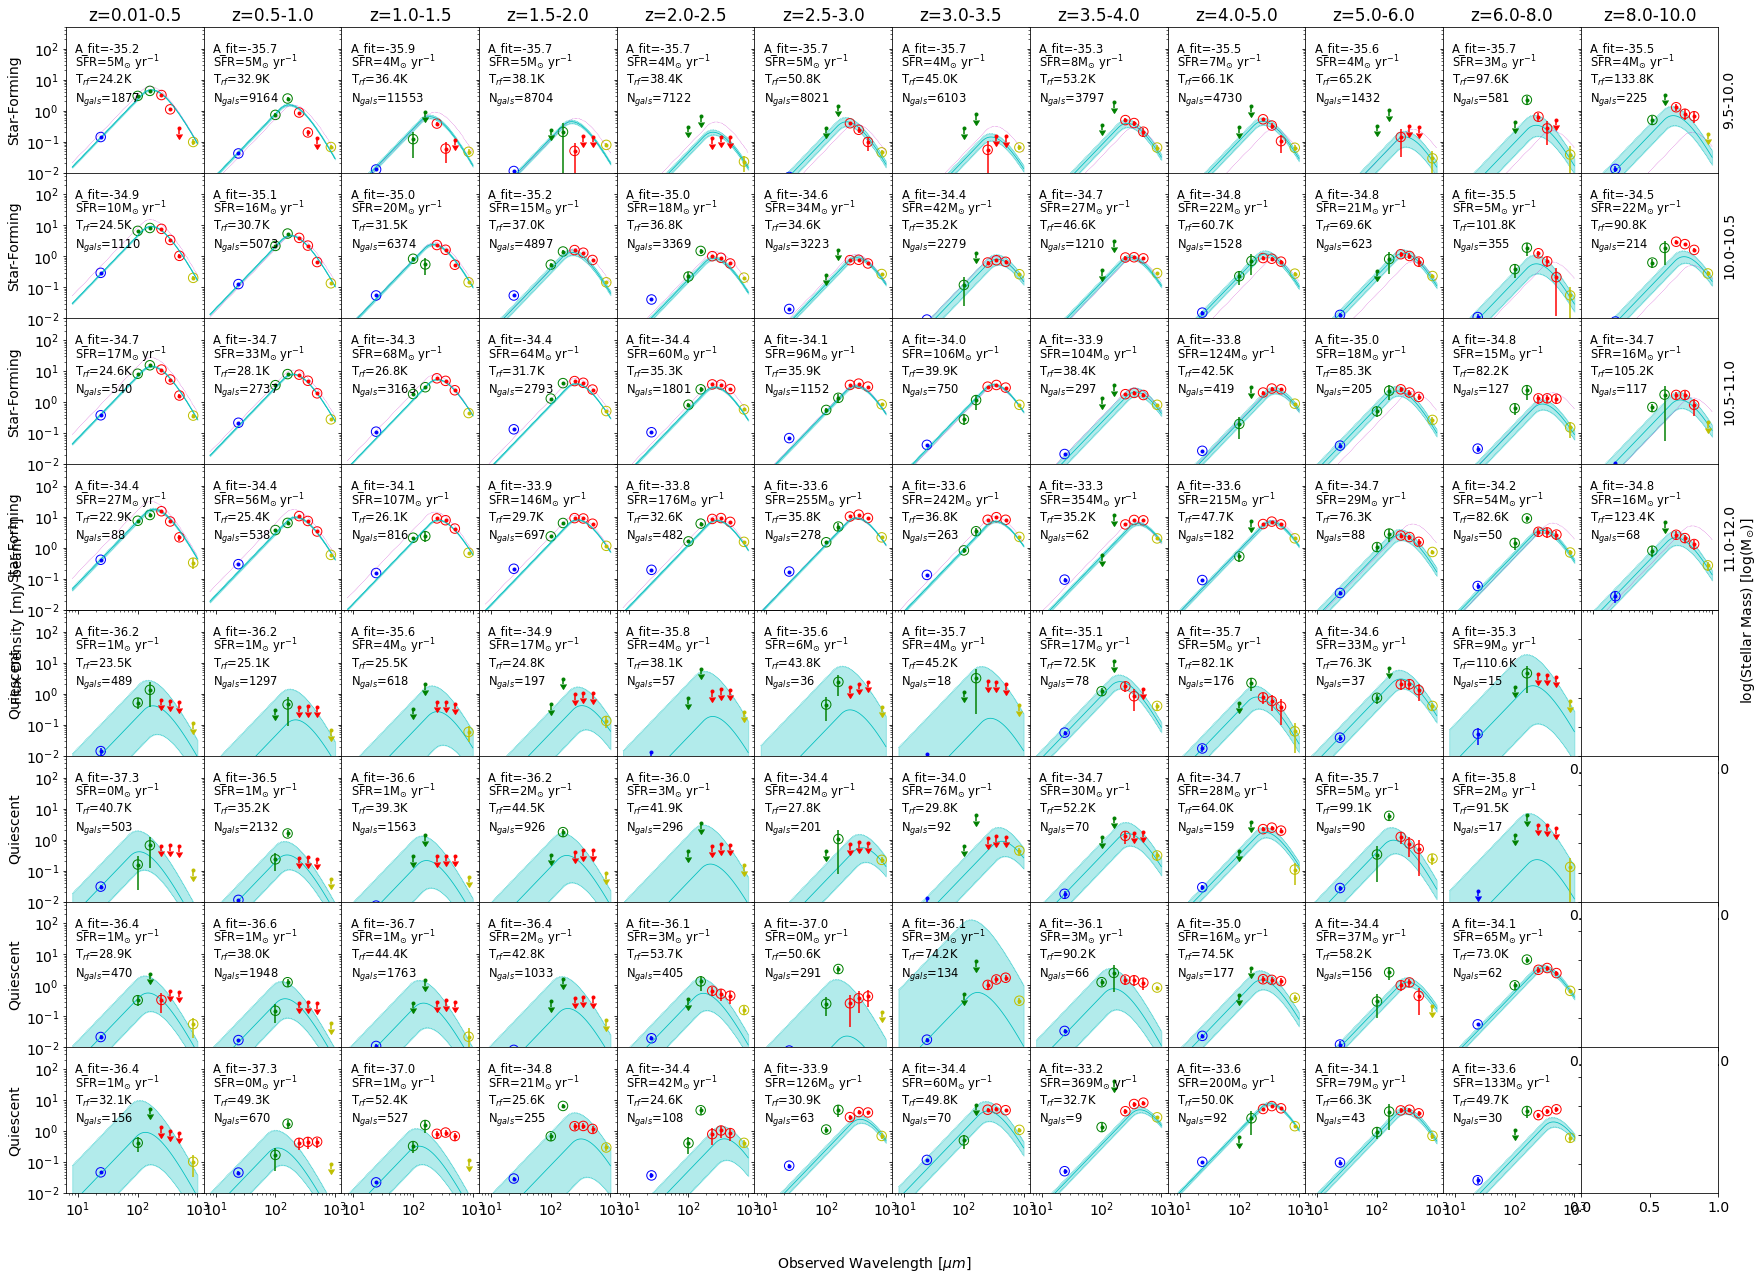

In [16]:
# Plot MCMC SEDs
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'), show_qt=True)

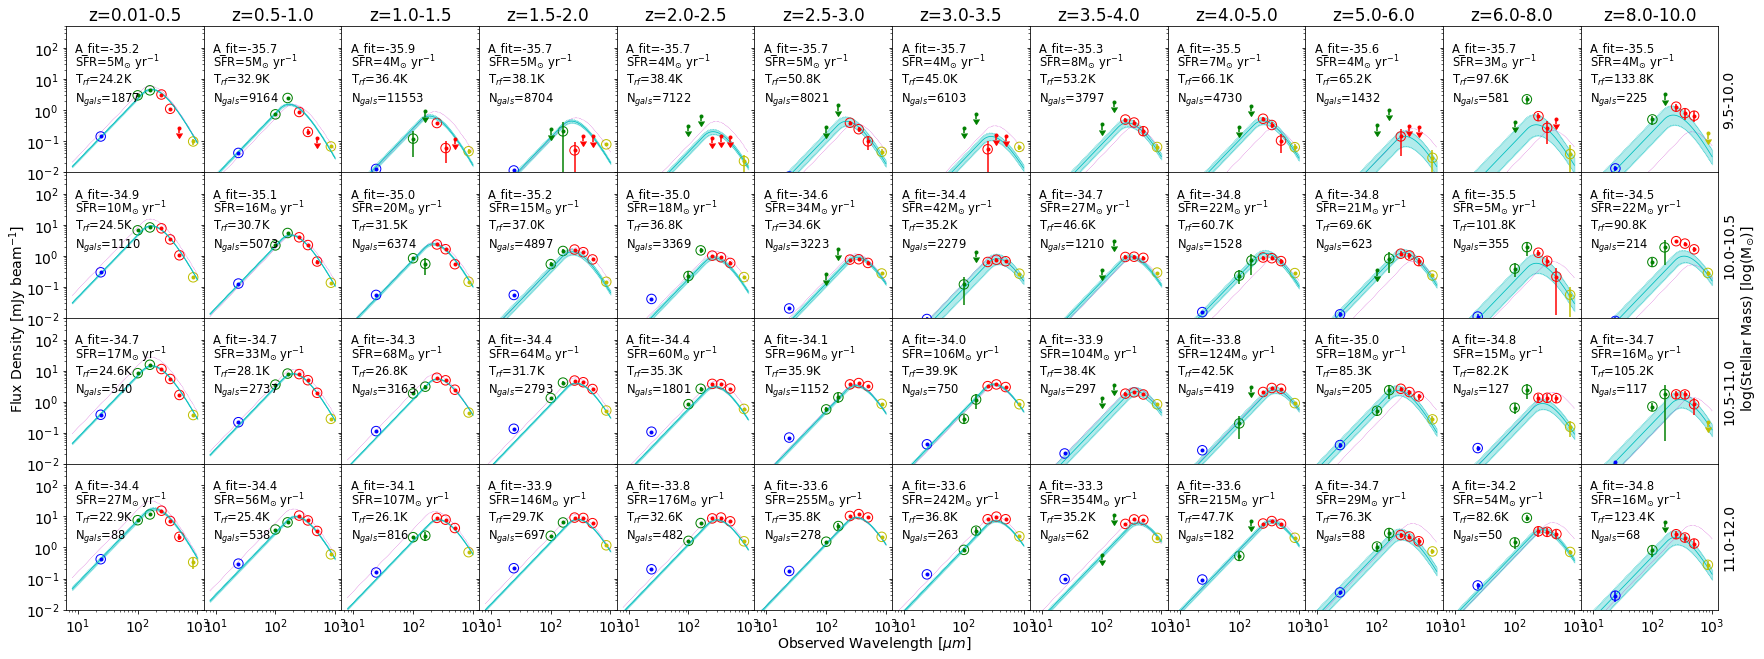

In [17]:
# Plot MCMC SEDs
simstack_object.plot_mcmc_seds(flat_samples_dict, bootstrap_dict=None, errors=('25', '75'))